# K-means

## 1. 데이터 생성

이전 자료와 같이 랜덤으로 데이터를 생성하는 함수 `generate_random_points()`를 이용한다.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(1)

def generate_random_points(size=10, low=0, high=1):
  return (high - low) * rng.random_sample((size, 2)) + low

구분 할 수 있는 데이터를 만들기 위해서 아래 두 클래스의 데이터를 만들고 하나로 합친다.

- `0 ~ 0.9` 데이터 20개
- `1.1 ~ 2` 데이터 20개

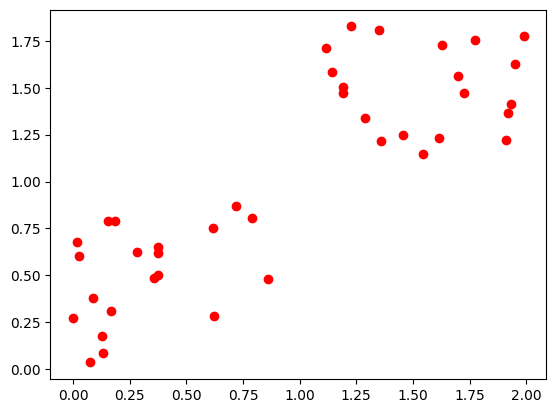

In [ ]:
C1 = generate_random_points(20, 0, 0.9)
C2 = generate_random_points(20, 1.1, 2)

X = np.vstack([C1, C2])

plt.plot(*X.T, 'ro')

## 2. K-means 실행

`sklearn`의 KMeans를 이용해서 위에서 만든 데이터를 넣고 클러스터링을 실행 한다.

이 때 클러스터의 개수 `n_clusters`(K값)은 2로 설정 한다.

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


산점도(Scatter plot)

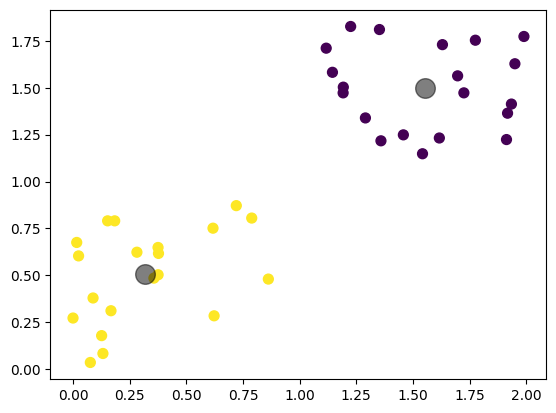

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

클러스터의 개수 n_clusters(K값)을 3으로 설정하고 클러스터링 결과를 확인할 수 있다.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


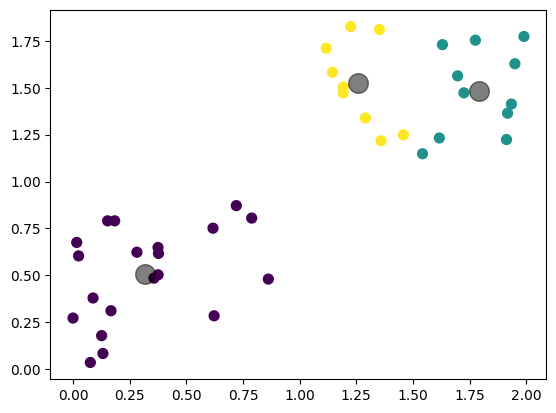

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# 데이터셋 랜덤 생성 함수
rng = np.random.RandomState(1)
def generate_random_points(size=10, low=0, high=1):
  return (high - low) * rng.random_sample((size, 2)) + low

# 두가지 클러스터의 데이터셋 생성 후 합치기
C1 = generate_random_points(20, 0, 0.9)
C2 = generate_random_points(20, 1.1, 2)
X = np.vstack([C1, C2])

# K-means 실행
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

# 실습2

붓꽃 클러스터링 및 분류

<img src="https://images.immediate.co.uk/production/volatile/sites/10/2022/02/2048-1365-iris-reticulata-c31b7f7.jpg" width="50%" height="50%"/>

## 패키지 로드

필요한 Python 패키지를 import 합니다.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

## 데이터셋 로드 및 확인


꽃 밭침과 꽃잎의 깊이와 너비 정보가 있습니다.

In [ ]:
iris = datasets.load_iris()

# labels(iris type) = [0, 0, 0, .... 1, 1, 1, ... , 2, 2, 2]
labels = pd.DataFrame(iris.target)
labels.columns=['labels']

# data
data = pd.DataFrame(iris.data)
data.columns=['Sepal length','Sepal width','Petal length','Petal width']

display(labels)
display(data)

,labels
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


,Sepal length,Sepal width,Petal length,Petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## 데이터 분리

꽃받침 길이와 너비만 사용 하도록 분리

In [ ]:
feature = data[['Sepal length','Sepal width']]
answer = labels[['labels']]

display(feature)
display(answer)

feature = feature.to_numpy()
answer = answer.to_numpy()

,Sepal length,Sepal width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


,labels
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


## 그래프 그리기


모든 데이터를 그래프로 표시한다.

(150, 2)
(2, 150)


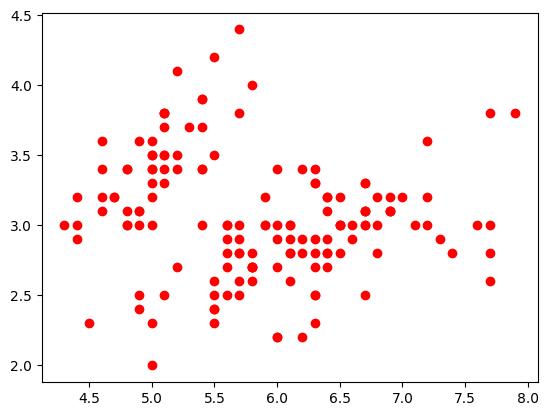

In [ ]:
print(feature.shape) # (150, 2)
X = feature.T
print(X.shape) # (2, 150)

plt.plot(*X, 'ro')

## Kmeans 알고리즘 실행

K를 `n_clusters` 파라미터로 설정 한다.

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X.T)
y_kmeans = kmeans.predict(X.T)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## Kmeans 알고리즘 결과 확인

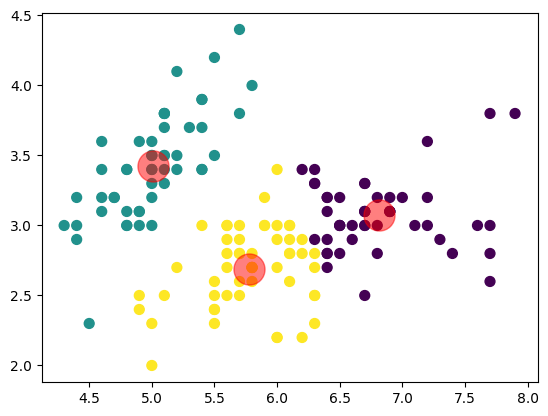

In [ ]:
plt.scatter(X[0, :], X[1, :], c=y_kmeans, s=50)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='r', s=500, alpha=0.5)

# 원본 데이터 정답 확인

원본 데이터셋에 있던 붓꽅 분류를 확인 해 봅니다.

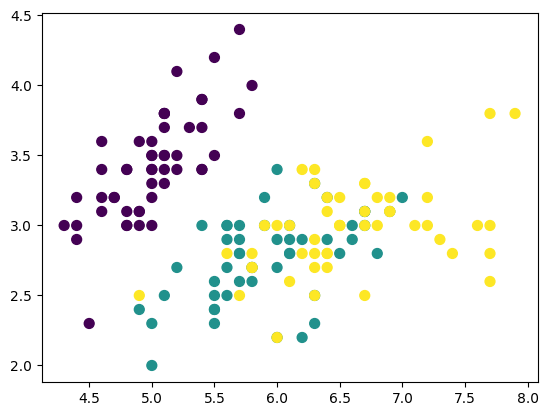

In [ ]:
plt.scatter(X[0, :], X[1, :], c=answer, s=50)

# 새 데이터 추가

In [ ]:
X2 = np.append(X, [[5.7], [2.0]], axis=1)

print(X.shape)
print(X2.shape)

(2, 150)
(2, 151)


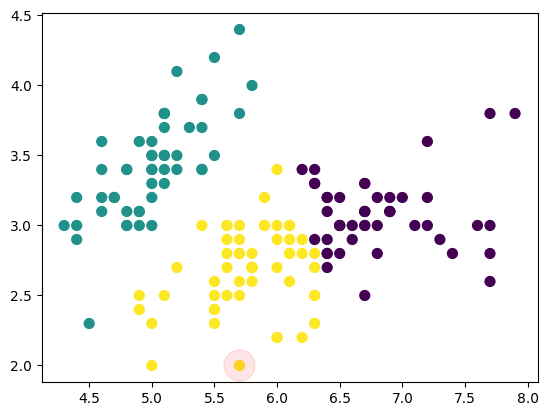

In [ ]:
y_kmeans2 = kmeans.predict(X2.T)

plt.scatter(X2[0, :], X2[1, :], c=y_kmeans2, s=50)
plt.scatter(X2[0, -1], X2[1, -1], c='r', s=500, alpha=0.1)